- ROC = receiver operating curve
- AUC = area under curve
- TPR = true positive rate
- FPR = false positive rate

In [15]:
# Data import
import numpy as np
import pandas as pd

spam_df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
# Data info
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
# Features x and y, and conversion to array

X = np.array(spam_df.v2.tolist())
y = np.array([(1 if i=="spam" else 0) for i in spam_df.v1.tolist()])

In [36]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

for train_index, test_index in splitter.split(X, y):
    X_train_pre_vectorize, X_test_pre_vectorize = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fit a vectorizer and transform the test and train sets.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_pre_vectorize)
X_test = vectorizer.transform(X_test_pre_vectorize)

Choose a classifier and fit it on the train set. I’ve arbitrarily chosen LogisticRegression.

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Let´s predict probalities of classes

In [40]:
y_score = classifier.predict_proba(X_test)
y_score = np.array(y_score)
print(y_score)

[[0.99576269 0.00423731]
 [0.9907706  0.0092294 ]
 [0.9945834  0.0054166 ]
 ...
 [0.99210256 0.00789744]
 [0.98972315 0.01027685]
 [0.98597468 0.01402532]]


In [41]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, neg_label=0, pos_label=1, classes=[0,1])
y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))
print(y_test_bin)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in [0,1]:
    # collect labels and scores for the current index
    labels = y_test_bin[:, i]
    scores = y_score[:, i]
    
    # calculates FPR and TPR for a number of thresholds
    fpr[i], tpr[i], thresholds = roc_curve(labels, scores)
    
    # given points on a curve, this calculates the area under it
    roc_auc[i] = auc(fpr[i], tpr[i])

In [43]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr["micro"], tpr["micro"])

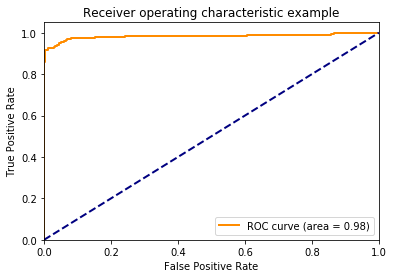

In [44]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()